In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ikynahidwin/depression-student-dataset")

file_path = path + "/depression-student-dataset.zip"

print("Path to dataset files:", path)

100%|██████████| 4.25k/4.25k [00:00<00:00, 6.95MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ikynahidwin/depression-student-dataset/versions/1


In [ ]:
#importing libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import tree,metrics
import shap


**Visualization and Pre-Processing**

In [ ]:
#Visualizing the data in mass
csv_file = os.path.join(path, "Depression Student Dataset.csv")
data = pd.read_csv(csv_file)
data.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,28,2.0,4.0,7-8 hours,Moderate,Yes,9,2,Yes,No
1,Male,28,4.0,5.0,5-6 hours,Healthy,Yes,7,1,Yes,No
2,Male,25,1.0,3.0,5-6 hours,Unhealthy,Yes,10,4,No,Yes
3,Male,23,1.0,4.0,More than 8 hours,Unhealthy,Yes,7,2,Yes,No
4,Female,31,1.0,5.0,More than 8 hours,Healthy,Yes,4,2,Yes,No


In [ ]:
#Watching the inputs of each row
print("Dataset Shape:", data.shape)
print("Column Names:", data.columns.tolist())
print("Data Types:", data.head())
print("\nDataset Info:\n")
data.info()

Dataset Shape: (502, 11)
Column Names: ['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']
Data Types:    Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes  

In [ ]:
#Checking for null values (none so WE ARE GOOD!)
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Gender                                   0
Age                                      0
Academic Pressure                        0
Study Satisfaction                       0
Sleep Duration                           0
Dietary Habits                           0
Have you ever had suicidal thoughts ?    0
Study Hours                              0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
#Spliting values
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours',
       'Financial Stress'],
      dtype='object')
Categorical Columns: Index(['Gender', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')


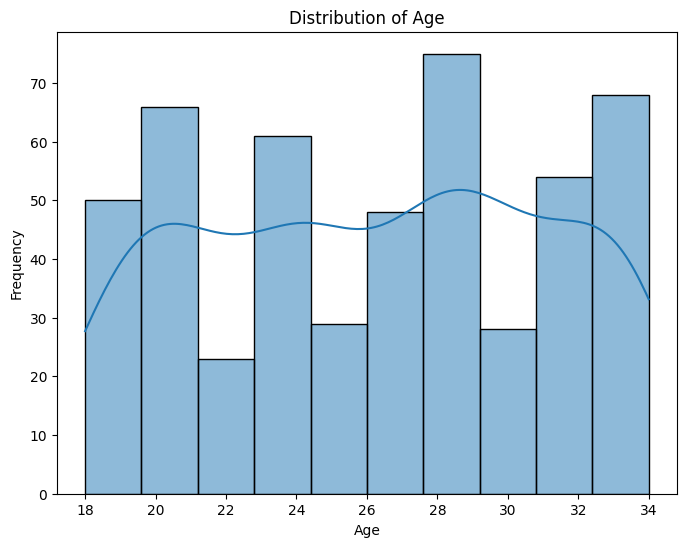

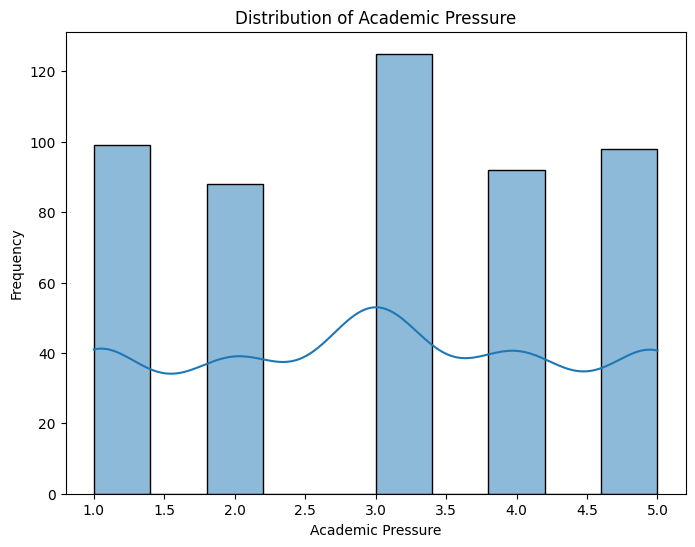

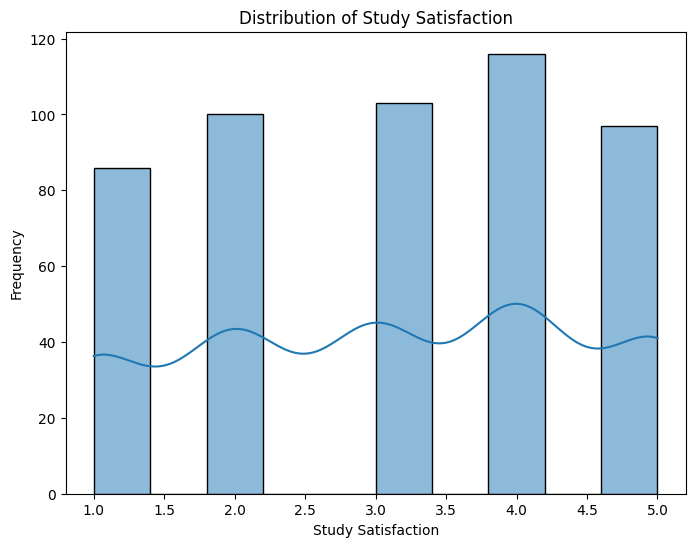

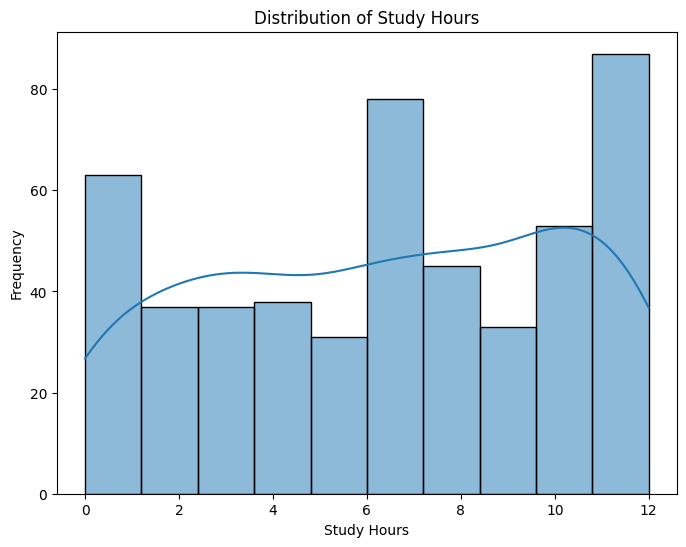

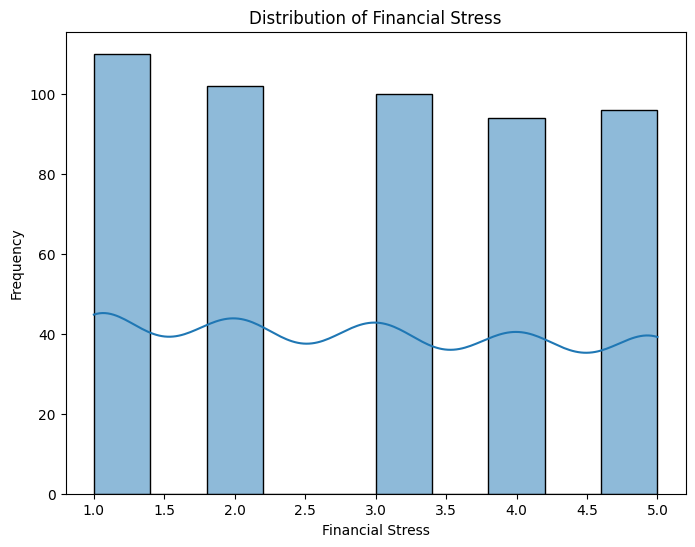

In [ ]:
#Visualizing the numerical values and then showcasing a frequency
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

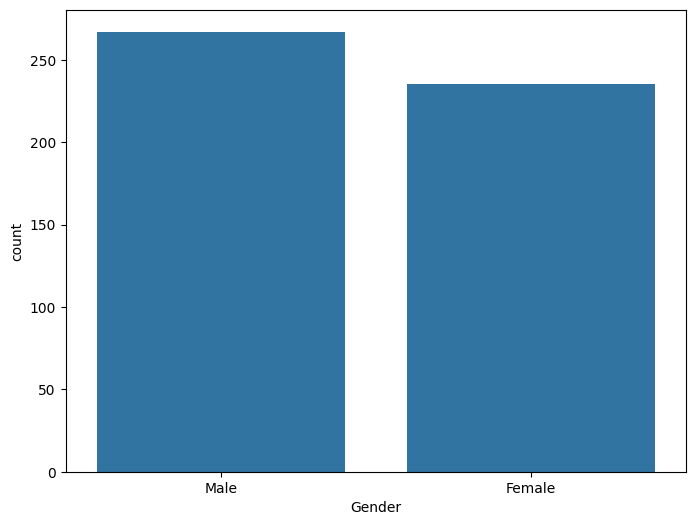

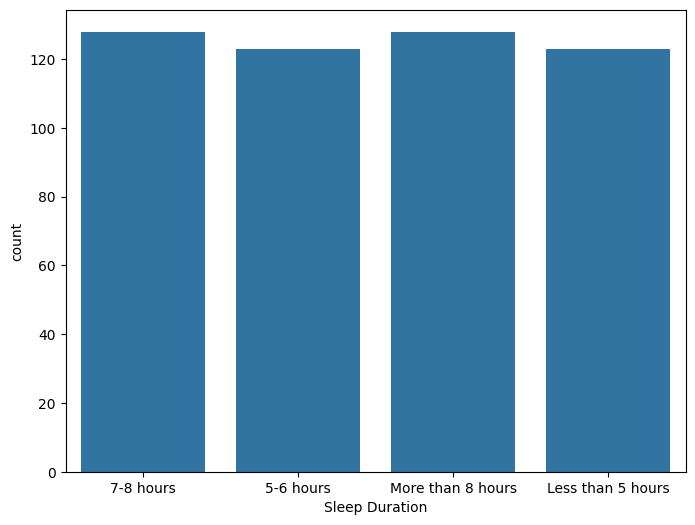

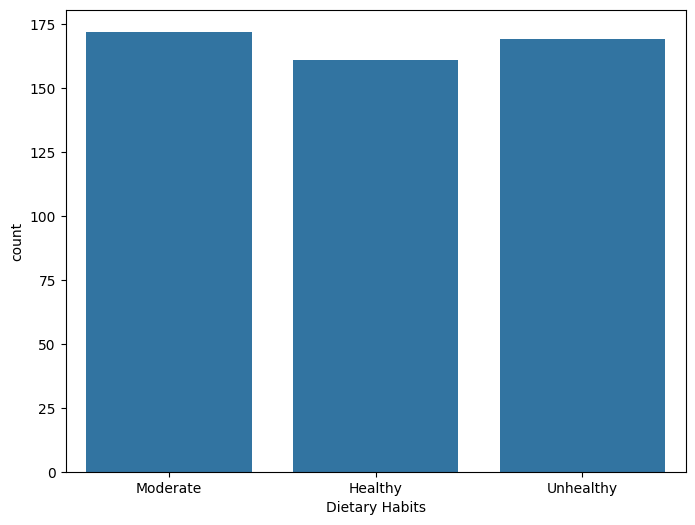

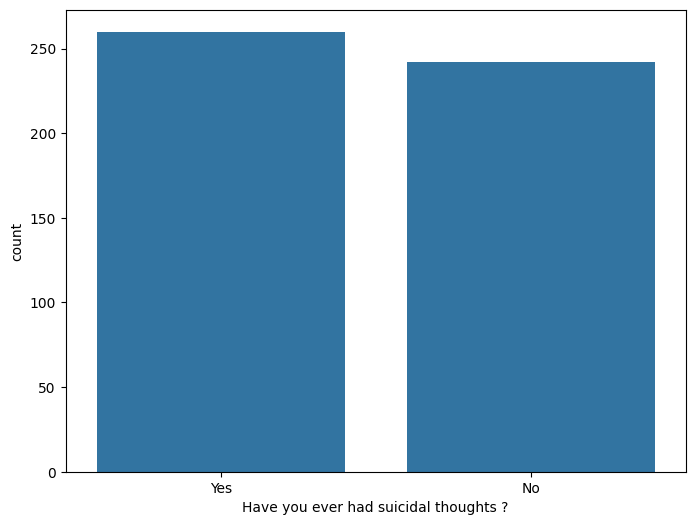

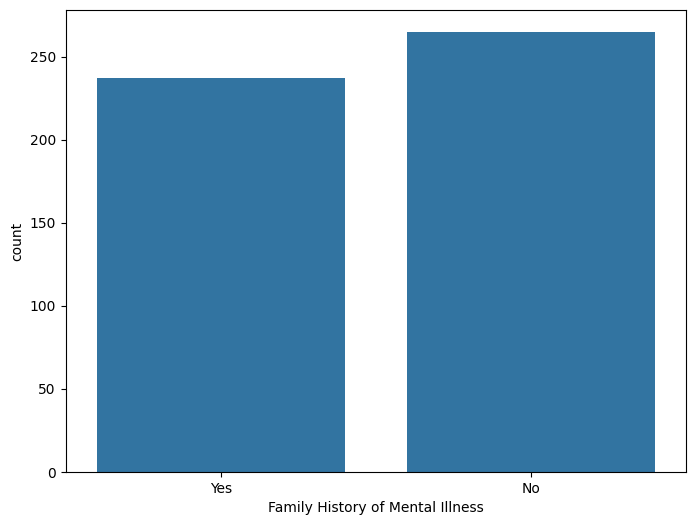

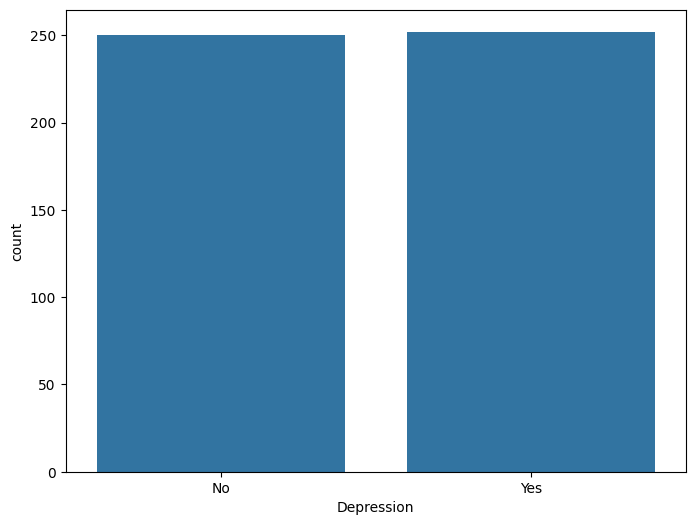

In [ ]:
#visualizing the obj values
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)

In [ ]:
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
print("\nNormalized Dataset:\n", data.shape)
print("\nFinal Column Names:\n", data.columns.to_list())


Normalized Dataset:
 (502, 11)

Final Column Names:
 ['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Study Hours', 'Financial Stress', 'Family History of Mental Illness', 'Depression']


In [ ]:
#changing catagorical data into numberic data for model training
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])
data['Sleep Duration'] = le.fit_transform(data['Sleep Duration'])
data['Dietary Habits'] = le.fit_transform(data['Dietary Habits'])
data['Have you ever had suicidal thoughts ?'] = le.fit_transform(data['Have you ever had suicidal thoughts ?'])
data['Family History of Mental Illness'] = le.fit_transform(data['Family History of Mental Illness'])
data['Depression'] = le.fit_transform(data['Depression'])

**Experiment 1**

In [ ]:
#creating our training and testing sets for the model
X = data.drop(columns = ['Depression'])
y = data['Depression']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2)

In [ ]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (401, 10)
X_test (101, 10)
y_train (401,)
y_test (101,)


In [ ]:
#training our model
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

In [ ]:
#evaluating our model
predicted = tree_model.predict(X_test)

print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        62
           1       0.76      0.74      0.75        39

    accuracy                           0.81       101
   macro avg       0.80      0.80      0.80       101
weighted avg       0.81      0.81      0.81       101

[[53  9]
 [10 29]]


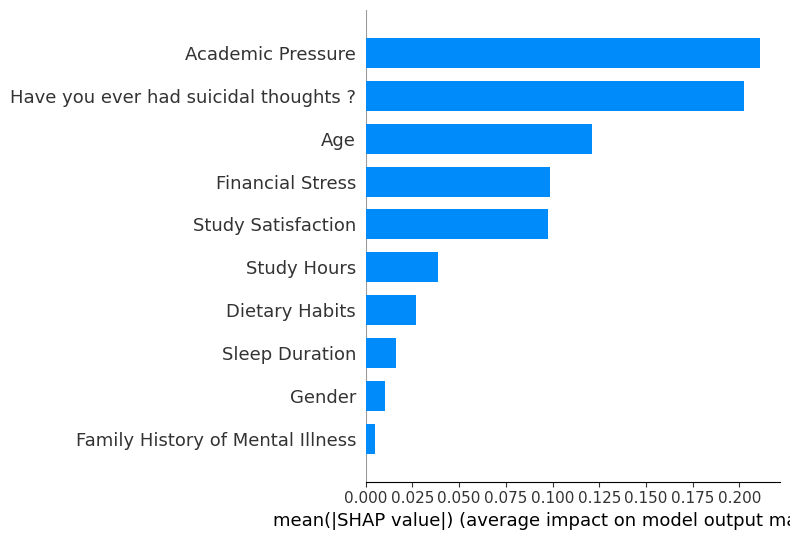

In [ ]:
#using shap to view feature importance for our model
explainer = shap.TreeExplainer(tree_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[:,:,1], X_test, plot_type = 'bar')

Expirment 2

In [ ]:
# Importing necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


# Training the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)




LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Making predictions
logistic_predictions = logistic_model.predict(X_test)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_predictions))



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        62
           1       0.95      0.95      0.95        39

    accuracy                           0.96       101
   macro avg       0.96      0.96      0.96       101
weighted avg       0.96      0.96      0.96       101

Confusion Matrix:
 [[60  2]
 [ 2 37]]


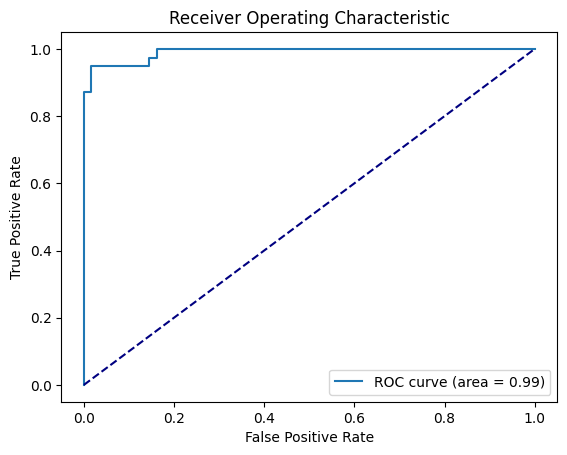

In [ ]:
# Plotting the ROC curve
logistic_probabilities = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, logistic_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

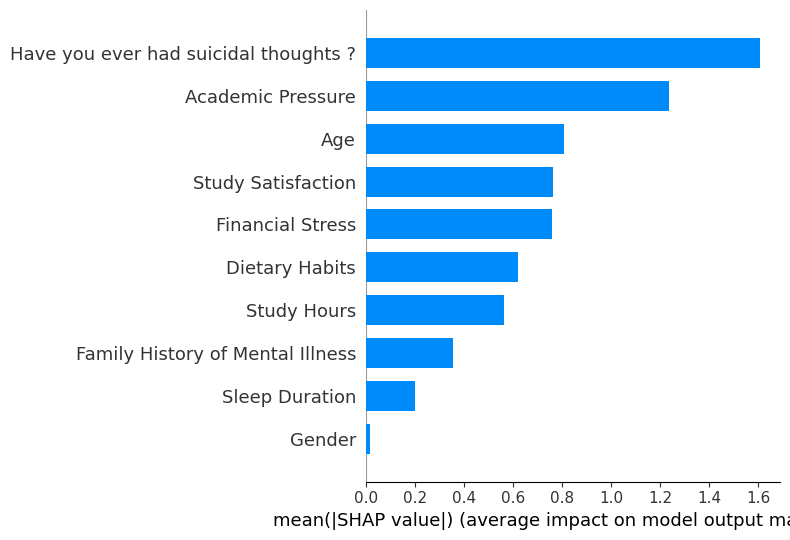

In [ ]:
# Using SHAP to view feature importance for logistic regression model
explainer = shap.Explainer(logistic_model, X_test)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")